# Human Cell Lines: single cell PCHA

In [259]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama
from scipy.spatial.distance import squareform
from scipy.sparse import issparse, csr_matrix, find
from scipy.spatial.distance import pdist
from py_pcha import PCHA

In [260]:
adata = sc.read_h5ad('../../out/cell-lines/adata_01.h5ad')

## Read in Files

In [2]:
indir = "../../data/single-cell-rna-seq/Human-cell-lines/"

samples =["2637-1-DMS454","2637-2-CORL279","2637-3-H1048","2638-1-H82","2638-2-H69","2638-4-H841","2639-1-H524","2639-2-DMS53"]
[a1,a2,a3,a4,a5,a6,a7, a8] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD113-1', 'SNORD113-2']
  + str(example_colliding_values)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Ex

In [3]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']


## Dropkick

In [10]:
batch_categories = ["DMS454","CORL279","H1048","H82","H69","H841","H524","DMS53"]
batch_key = 'cline'

adatas = [a1,a2,a3,a4,a5,a6,a7,a8] 


adata = mb.pp.dropkick_recipe(adatas, verbose=False, filter=False, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot = False, n_hvgs=None,
                                                retain_genes=tfs)


Running dropkick on each sample and filtering...
Chosen lambda value:
	[0.05393782]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02565323]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.03505034]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.036478]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.10863844]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.04689123]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02251933]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.02150734]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 86492 × 63677
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841'
    layers: 'ambig

In [11]:
adata

AnnData object with n_obs × n_vars = 86349 × 22475
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'raw_counts

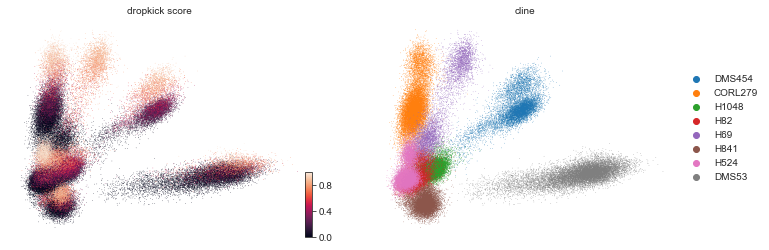

In [14]:
scv.pl.pca(adata, color = ['dropkick_score','cline'], legend_loc = 'on right')

In [15]:
scv.pp.neighbors(adata, random_state=0)
scv.tl.umap(adata, random_state=0)

computing neighbors
    finished (0:00:30) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


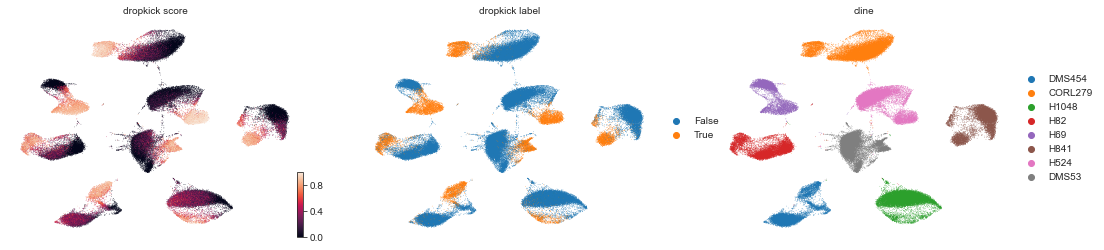

In [25]:
scv.pl.umap(adata, color = ['dropkick_score','dropkick_label','cline'], legend_loc = 'on right')

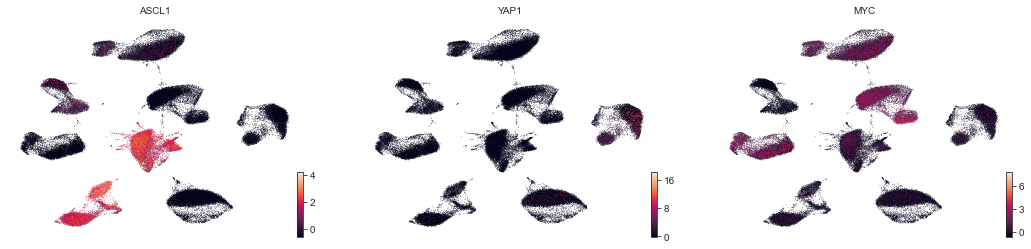

In [19]:
scv.pl.umap(adata, color = ['ASCL1','YAP1','MYC'], legend_loc = 'on right')

In my dropkick recipe, setting filter = False will add the dropkick labels/scores to adata but does not actually filter any cells or genes. It **will** filter cells and genes based on scanpy's and scvelo's functions:
`sc.pp.filter_cells(adata, min_genes=min_genes);
scv.pp.filter_genes(adata, min_counts=min_counts, retain_genes=retain_genes)`


In [31]:
adata_dk = adata[adata.obs.dropkick_label=='True'].copy() #if this throws an error or gives 0 cells, try ==1 or == True

In [32]:
scv.pp.pca(adata_dk, random_state=0)

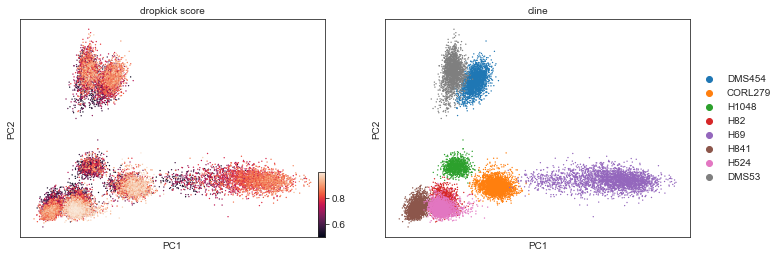

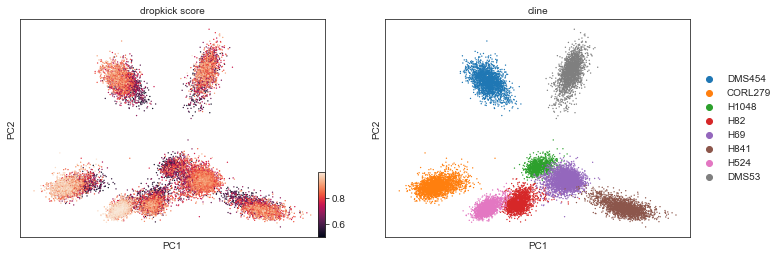

In [45]:
scv.pl.pca(adata_dk, color = ['dropkick_score','cline'], legend_loc = 'on right', components="1,2", frameon=True)
scv.pl.pca(adata_dk, color = ['dropkick_score','cline'], legend_loc = 'on right', components="3,2", frameon = True)

In [34]:
scv.pp.neighbors(adata_dk, random_state=0)
scv.tl.umap(adata_dk, random_state=0)

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


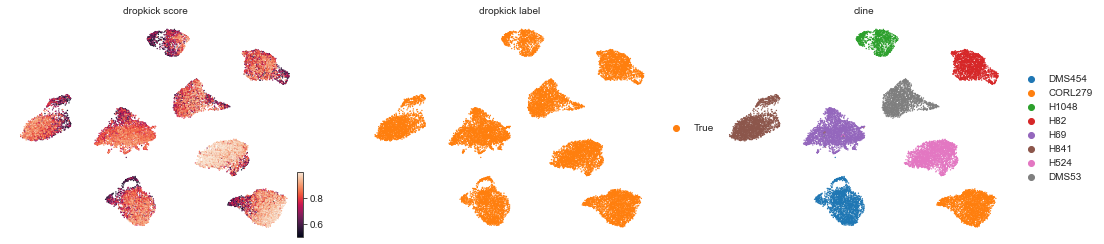

In [36]:
scv.pl.umap(adata_dk, color = ['dropkick_score','dropkick_label','cline'], legend_loc = 'on right')

In [37]:
adata_dk.write_h5ad('../../out/cell-lines/adata_dk_01.h5ad')

In [18]:
a1 = adatas.pop(0)
adata = a1.concatenate(adatas, batch_key=batch_key, batch_categories=batch_categories)

In [21]:
verbose = False,
n_hvgs = 2000,
min_genes = 100,
min_counts = 3,
retain_genes = tfs
mito_names="^mt-|^MT-"
n_ambient=10
target_sum=None
batch_categories = batch_categories
batch_key = batch_key                                         
X_final = 'log1p_norm'

In [22]:
orig_shape = adata.shape

# store raw counts before manipulation
adata.layers["raw_counts"] = adata.X.copy()

#filter cells and genes
sc.pp.filter_cells(adata, min_genes=min_genes)
scv.pp.filter_genes(adata, min_counts=min_counts, retain_genes=retain_genes)
if verbose:
    if adata.shape[0] != orig_shape[0]:
        print(
            "Ignoring {} barcodes with less than {} genes detected".format(
                orig_shape[0] - adata.shape[0], min_genes
            )
        )
    if adata.shape[1] != orig_shape[1]:
        print(
            "Ignoring {} genes with zero total counts".format(
                orig_shape[1] - adata.shape[1]
            )
        )
adata.obs.drop(columns=["n_genes"], inplace=True)
print(adata)


Filtered out 41202 genes that are detected (3,) counts (spliced).
Ignoring 143 barcodes with less than (100,) genes detected
Ignoring 41202 genes with zero total counts
AnnData object with n_obs × n_vars = 86349 × 22475
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'cline', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-CORL279', 'dropkick_coef-DMS454', 'dropkick_coef-DMS53', 'dropkick_coef-H1048', 'dropkick_coef-H524', 'dropkick_coef-H69', 'dropkick_coef-H82', 'dropkick_coef-H841'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'raw_counts'


In [23]:

# identify mitochondrial genes
adata.var["mito"] = adata.var_names.str.contains(mito_names)
# identify putative ambient genes by lowest dropout pct (top n_ambient)
adata.var["pct_dropout_by_counts"] = np.array(
    (1 - (adata.X.astype(bool).sum(axis=0) / adata.n_obs)) * 100
).squeeze()
lowest_dropout = adata.var.pct_dropout_by_counts.nsmallest(n=n_ambient).min()
highest_dropout = adata.var.pct_dropout_by_counts.nsmallest(n=n_ambient).max()
adata.var["ambient"] = adata.var.pct_dropout_by_counts <= highest_dropout
# reorder genes by dropout rate
adata = adata[:, np.argsort(adata.var.pct_dropout_by_counts)].copy()
if verbose:
    print(
        "Top {} ambient genes have dropout rates between {} and {} percent:\n\t{}".format(
            len(adata.var_names[adata.var.ambient]),
            round(lowest_dropout, 3),
            round(highest_dropout, 3),
            adata.var_names[adata.var.ambient].tolist(),
        )
    )
# calculate standard qc .obs and .var
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mito", "ambient"], inplace=True, percent_top=None
)


# other arcsinh-transformed metrics
adata.obs["arcsinh_total_counts"] = np.arcsinh(adata.obs["total_counts"])
adata.obs["arcsinh_n_genes_by_counts"] = np.arcsinh(
    adata.obs["n_genes_by_counts"]
)

# normalize counts before transforming
sc.pp.normalize_total(adata, target_sum=target_sum, layers=None, layer_norm=None)
adata.layers["norm_counts"] = adata.X.copy()


Top 10 ambient genes have dropout rates between 0.727 and 4.87 percent:
	['MT-ND4', 'MT-ND3', 'MT-CO3', 'RPS19', 'MT-RNR2', 'MT-ND1', 'MT-ND2', 'MT-ATP6', 'MT-CYB', 'HIST1H4C']


In [26]:
# adata.layers["log1p_norm"] = adata.X.copy()  # save to .layers
sc.pp.highly_variable_genes(
    adata, n_top_genes=2000, n_bins=20, flavor="seurat"
)
adata.var.drop(columns=["dispersions", "dispersions_norm"], inplace=True)
# arcsinh-transform normalized counts (adata.layers["arcsinh_norm"])
adata.X = np.arcsinh(adata.layers["norm_counts"])
sc.pp.scale(adata)  # scale genes for feeding into model ############ If there is a discrepancy with scanpy recipe, this might be why
adata.layers[
    "arcsinh_norm"
] = adata.X.copy()  # save arcsinh scaled counts in .layers

adata.X = np.log1p(adata.layers["norm_counts"])
sc.pp.scale(adata)  # scale genes for feeding into model
adata.layers[
    "log1p_norm"
] = adata.X.copy()  # save log1p scaled counts in .layers

# remove unneeded stuff
del adata.layers["norm_counts"]

# set .X as desired for downstream processing; default raw_counts
if (X_final != "raw_counts") & verbose:
    print("Setting {} layer to .X".format(X_final))
adata.X = adata.layers[X_final].copy()

scv.tl.score_genes_cell_cycle(adata)
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

In [3]:
# sc.tl.pca(adata)
# sc.pl.pca(adata, color = 'cline')

In [4]:
# sc.pp.neighbors(adata, random_state=0)
# sc.tl.umap(adata, random_state=0)
# sc.pl.umap(adata, color = 'cline')

In [5]:
# mb.pp.scanorama_recipe(adata, groups = 'cline', correct = True, basis = 'umap')

In [5]:
# mb.pp.scanpy_recipe(adata_full, retain_genes=tfs)


Filtered out 45412 genes that are detected in less than 3 cells (spliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


AnnData object with n_obs × n_vars = 16671 × 18265
    obs: 'cline', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'cline_colors'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [6]:
# adata_check = adata_full.copy()

In [9]:
# adata_check.X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Integration using scanorama

In [6]:
adata = sc.read_h5ad('../../out/cell-lines/adata_dk_01.h5ad')

We'll use scanorama's umap to visualize the data. Scanorama has been updated since I first wrote this code, so I updated it appropriately. Now, we split adata into batches and give the list of adatas to scanorama.correct_scanpy. `corrected` is a new list of adatas where X is the corrected data and `corrected[0].obsm['X_scanorama']` has the integrated data for dimensionality reduction. I can then use the integrated data to find nearest neighbors and run umap, or run a PCA on the corrected data X. 
```
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")
```

In [47]:
# mb.pp.scanorama_recipe(adata_dk, groups = 'cline', correct = True, basis = 'umap')
#updated scanorama 1.7 broke this function because it only returns one value instead of a two-tuple for correct_scanpy

In [24]:
batches = sorted(adata.obs['cline'].cat.categories)

alldata = {}
for batch in batches:
    print(batch)
    alldata[batch] = adata[adata.obs['cline'] == batch,]

# convert to list of AnnData objects
adatas = list(alldata.values())
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)
for i in corrected:
    print(i.obs['cline'][0])

CORL279
DMS454
DMS53
H1048
H524
H69
H82
H841
Found 22475 genes among all datasets
[[0.         0.10313901 0.         0.04636459 0.00085288 0.01643444
  0.01110462 0.00048473]
 [0.         0.         0.10114599 0.03477345 0.         0.00149477
  0.00058445 0.        ]
 [0.         0.         0.         0.09799789 0.         0.
  0.         0.01696558]
 [0.         0.         0.         0.         0.00105374 0.00842993
  0.06638567 0.15068493]
 [0.         0.         0.         0.         0.         0.
  0.2226768  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.04441847 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11972855]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (4, 6)
Processing datasets (3, 7)
Processing datasets (6, 7)
Processing datasets (0, 1)
Processing datasets (1, 2)
CORL279
DMS454
DMS53
H1048
H524
H69
H82
H841


Now `corrected.X` can be added to adata as a new layer `corrected`, and `corrected.obsm['X_scanorama']` can be added to `adata.obsm`.

In [86]:
#if you rerun this, it **will** pop off another adata and you will have removed a cell line!!
#if you do, use this before rerunning: 
#corrected = [first, corrected[0],corrected[1],corrected[2],corrected[3],corrected[4],corrected[5],corrected[6]]

first = corrected.pop(0)
adata_SC = first.concatenate(corrected, batch_key='cline',
                                            batch_categories=batches)

In [44]:
adata.layers['corrected'] = adata_SC.X
adata.obsm['X_scanorama'] = adata_SC.obsm['X_scanorama']

In [52]:
#del adata_SC

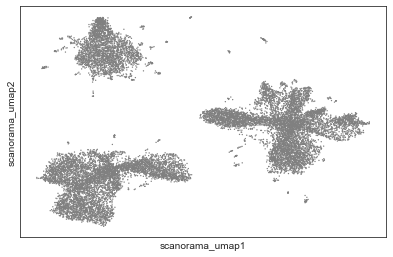

In [48]:
sc.pp.neighbors(adata, use_rep="X_scanorama", key_added='scanorama_neighbors')
tmp = sc.tl.umap(adata, neighbors_key='scanorama_neighbors', random_state=0, copy=True)
adata.obsm['X_scanorama_umap'] = tmp.obsm['X_umap']
del tmp
sc.pl.scatter(adata, basis='scanorama_umap')

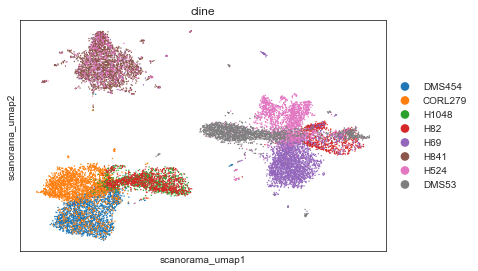

In [49]:
sc.pl.scatter(adata, basis='scanorama_umap', color='cline')

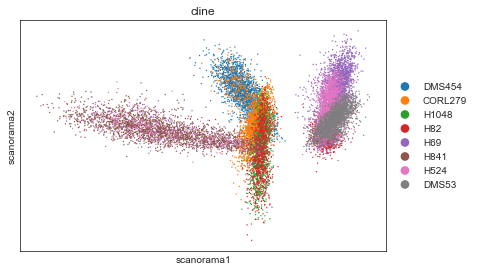

In [50]:
sc.pl.scatter(adata, basis='scanorama', color='cline')

Honestly, this looks weird. I need to doublecheck the cell lines are being assigned correctly because scanorama first matches H82 and H524, and those are no where near each other.

I am not sure if I should correct for cell cycle before running magic, so I will try both ways and look at the final results.

## MAGIC-- used for archetype analysis

Because we filtered out the dropkick cells after filtering cells and genes with scanpy, we need to doublecheck that all of the genes are actually expressed in the dataset, so we'll do a small filter to get rid of any genes we missed.

In [54]:
sc.pp.filter_genes(adata, min_cells=3)

In [55]:
import magic
# import pandas as pd
# import matplotlib.pyplot as plt
magic_operator = magic.MAGIC(solver='approximate')
X_magic = magic_operator.fit_transform(adata)


Calculating MAGIC...
  Running MAGIC on 16108 cells and 20446 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 30.30 seconds.
    Calculating affinities...
    Calculated affinities in 28.56 seconds.
  Calculated graph and diffusion operator in 67.48 seconds.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 71.47 seconds.


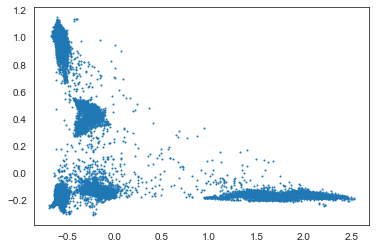

In [57]:
plt.scatter(X_magic.obs_vector('ASCL1'), X_magic.obs_vector('NEUROD2'),  s=1, cmap='inferno')


In [71]:
sc.pp.pca(X_magic)

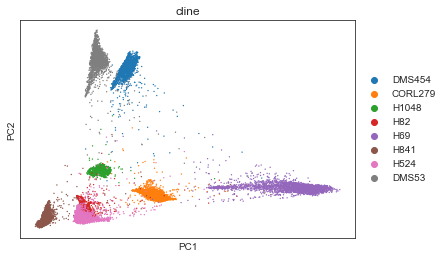

In [72]:
sc.pl.pca(X_magic, color='cline')

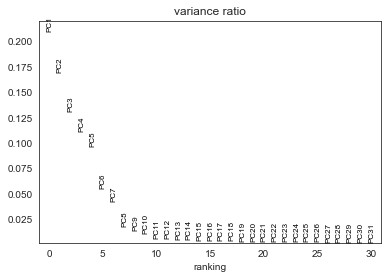

In [102]:
sc.pl.pca_variance_ratio(X_magic)

In [ ]:
pca_var = X_magic.uns['pca']['variance_ratio']

tot_exp_var = 0
n = 0
for i in pca_var:
    n +=1
    tot_exp_var += i
    if tot_exp_var > .9: 
        print(n)
        break

In [ ]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]
 
lists = pca_var
print(Cumulative(lists))

## MAGIC

In [55]:
import magic
# import pandas as pd
# import matplotlib.pyplot as plt
magic_operator = magic.MAGIC(solver='approximate')
X_magic = magic_operator.fit_transform(adata)


Calculating MAGIC...
  Running MAGIC on 16108 cells and 20446 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 30.30 seconds.
    Calculating affinities...
    Calculated affinities in 28.56 seconds.
  Calculated graph and diffusion operator in 67.48 seconds.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 71.47 seconds.


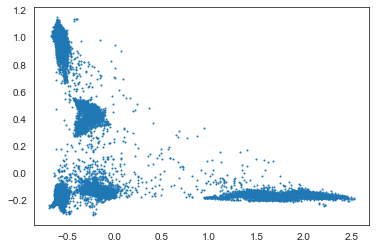

In [57]:
plt.scatter(X_magic.obs_vector('ASCL1'), X_magic.obs_vector('NEUROD2'),  s=1, cmap='inferno')


In [71]:
sc.pp.pca(X_magic)

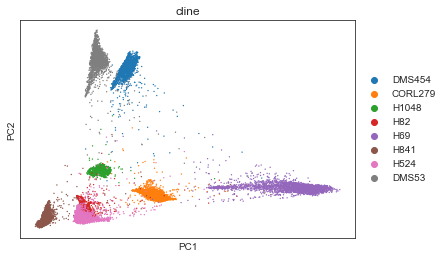

In [72]:
sc.pl.pca(X_magic, color='cline')

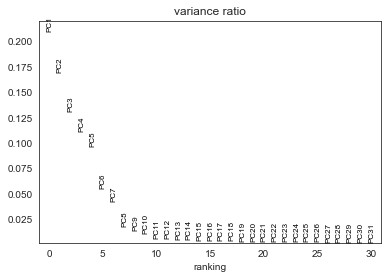

In [102]:
sc.pl.pca_variance_ratio(X_magic)

In [376]:
pca_var = X_magic.uns['pca']['variance_ratio']
var_explained = .85
tot_exp_var = 0
n = 0
for i in pca_var:
    n +=1
    tot_exp_var += i
    if tot_exp_var > var_explained: 
        print(n+1, "PCs explain at least", var_explained*100, "percent of the variance")
        break

11 PCs explain at least 85.0 percent of the variance


In [351]:
def cumulative(var):
    cum_var = []
    tot_sum = 0
    for i in var:
        tot_sum += i
        cum_var.append(tot_sum)
    return cum_var


In [360]:
cum_var[7]

0.834827110171318

In [363]:
def find_knee_varexpl(cum_var):
    farthestk = 0
    for i in range(50):
        #find distance of point p3 from line between p1 and p2
        p1=np.array([0,cum_var[0]])
        p2=np.array([49,cum_var[49]])
        p3=np.array([i,cum_var[i]])
        k = (np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))

        #knee is farthest away from line between p1 and p2
        if k > farthestk: 
            farthestk = k
            knee = i
    return knee +1 # number of components is 1 more than index
cum_var = cumulative(pca_var)
print("Knee of EV vs PC plot: ",find_knee_varexpl(cum_var))

Knee of EV vs PC plot:  8


In [338]:
# X_magic.write_h5ad('../../out/cell-lines/X_magic_02.h5ad')

# PCHA on MAGIC imputed data

In [147]:
!pip install py_pcha

In [14]:
X_magic = sc.read_h5ad('../../out/cell-lines/X_magic_02.h5ad')

In [16]:
def find_knee(ev_per_arc, kmax):
    farthestk = 0
    for i in range(3,kmax):
        #find distance of point p3 from line between p1 and p2
        p1=np.array([3,ev_per_arc[0]])
        p2=np.array([kmax,ev_per_arc[kmax-3]])
        p3=np.array([i,ev_per_arc[i-3]])
        k = (np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))

        #knee is farthest away from line between p1 and p2
        if k > farthestk: 
            farthestk = k
            knee = i
    print("K* =",knee, "archetypes, distance between k* and line: ",np.round(farthestk,2))
    return knee, farthestk

## Full PCA with 50 components
Running PCHA on the full PCA (50 components)-- the variance explained here is the proportion of the variance in the full 50 components.

0
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 5 archetypes, distance between k* and line:  0.11


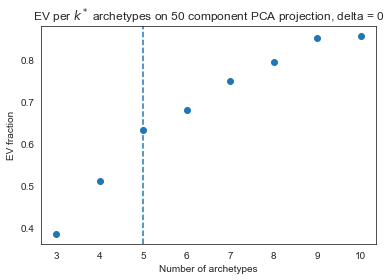

0.1
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 7 archetypes, distance between k* and line:  0.12


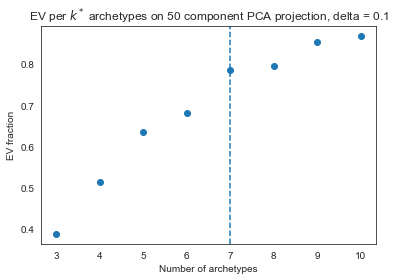

0.2
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.07
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 7 archetypes, distance between k* and line:  0.12


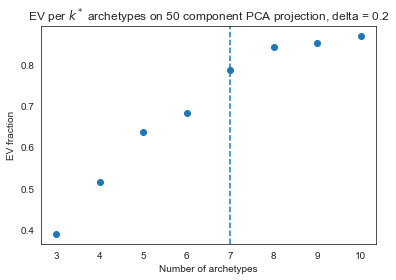

0.5
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 6 archetypes, distance between k* and line:  0.12
k_max = 10
K* = 6 archetypes, distance between k* and line:  0.14


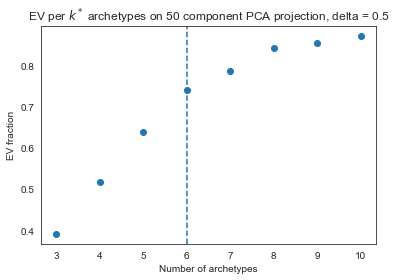

1
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 6 archetypes, distance between k* and line:  0.12
k_max = 10
K* = 6 archetypes, distance between k* and line:  0.14


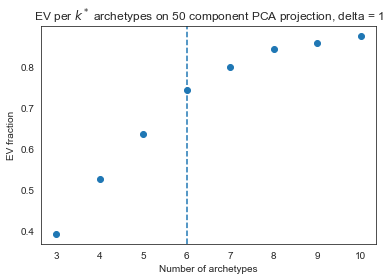

In [18]:
def ev_per_arc_by_delta_50comp(delta):
    ev_per_arc = []
    for i in range(3,11):
        XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=i, delta=delta)
        ev_per_arc.append(varexpl)
        # print(varexpl)
    plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)
    plt.title(f"EV per $k^*$ archetypes on 50 component PCA projection, delta = {delta}")
    plt.xlabel("Number of archetypes")
    plt.ylabel("EV fraction")
    print("Knee in EV vs k plot for different k_max:")
    for kmax in range(8,11):
        print('k_max =', kmax)
        knee, farthestk = find_knee(ev_per_arc, kmax=kmax)
    plt.axvline(x=knee, linestyle = "--")
    plt.savefig(f'../../figures/EV_per_k_50comp_clines_delta_{delta}.pdf')
    plt.show()
for delta in [0,0.1,0.2,0.5,1]:
    print(delta)
    ev_per_arc_by_delta_50comp(delta)

### Three archetypes

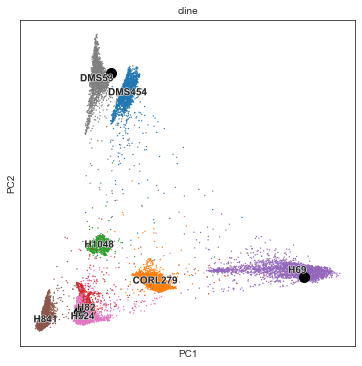

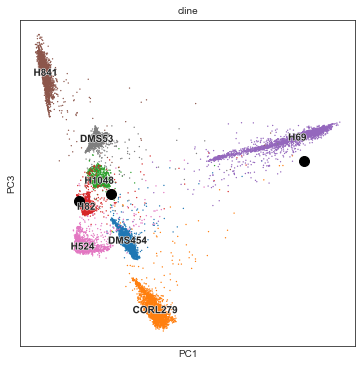

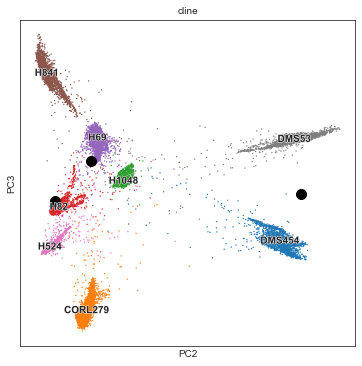

In [23]:
XC_3_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=3, delta=0.1)
XC_3_50comp = np.array(XC_3_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_3_50comp[int(comp[0])-1], XC_3_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

### Five archetypes

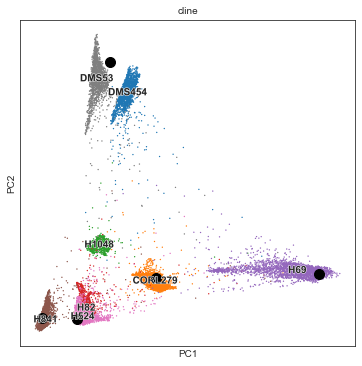

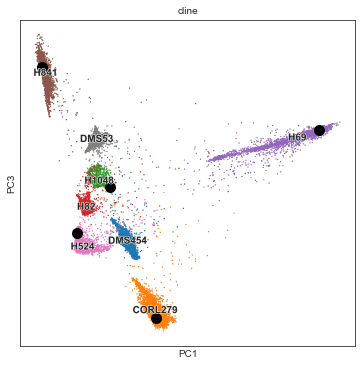

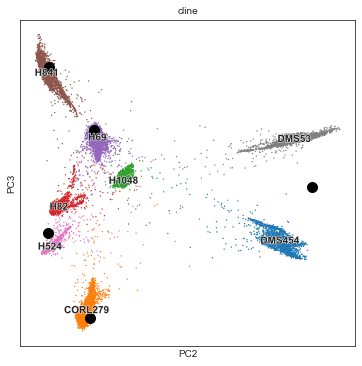

In [19]:
XC_5_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=5, delta=0.1)
XC_5_50comp = np.array(XC_5_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_5_50comp[int(comp[0])-1], XC_5_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

### Six archetypes

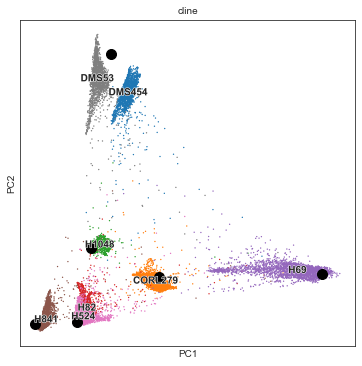

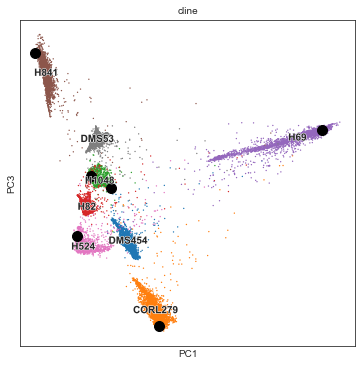

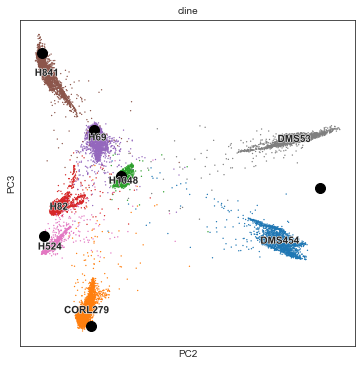

In [20]:
XC_6_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=6, delta=0.1)
XC_6_50comp = np.array(XC_6_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_6_50comp[int(comp[0])-1], XC_6_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

### Seven archetypes

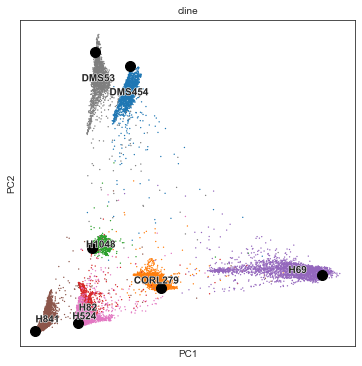

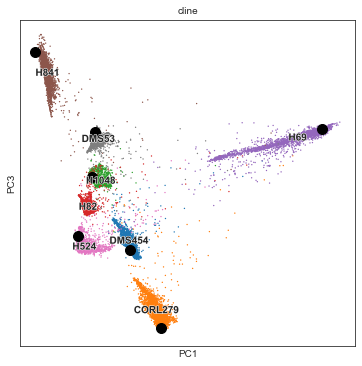

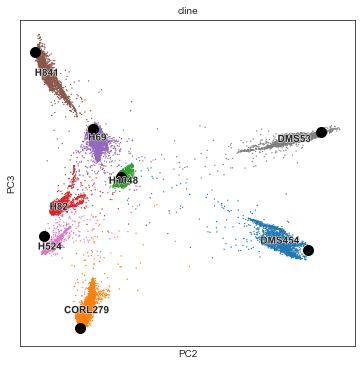

In [21]:
XC_7_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=7, delta=0.1)
XC_7_50comp = np.array(XC_7_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_7_50comp[int(comp[0])-1], XC_7_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

**Conclusions**
When we run a PCA on the magic imputed dataset, over 80% of the variance in explained by just the first 8 components (most likely due to the fact that we have 8 samples). PCHA in the full PCA space (50 components) shows that 5 or 7 archetypes best describe the data. With five archetypes, we get archetypes near H841 (Y), H524 (N), DMS454/53 (A2), H69 (A), and CORL279 (A/N). H1048 and H82 are closer to the middle. We can use the method described in the MAGIC paper to assign archetypal neighborhoods.
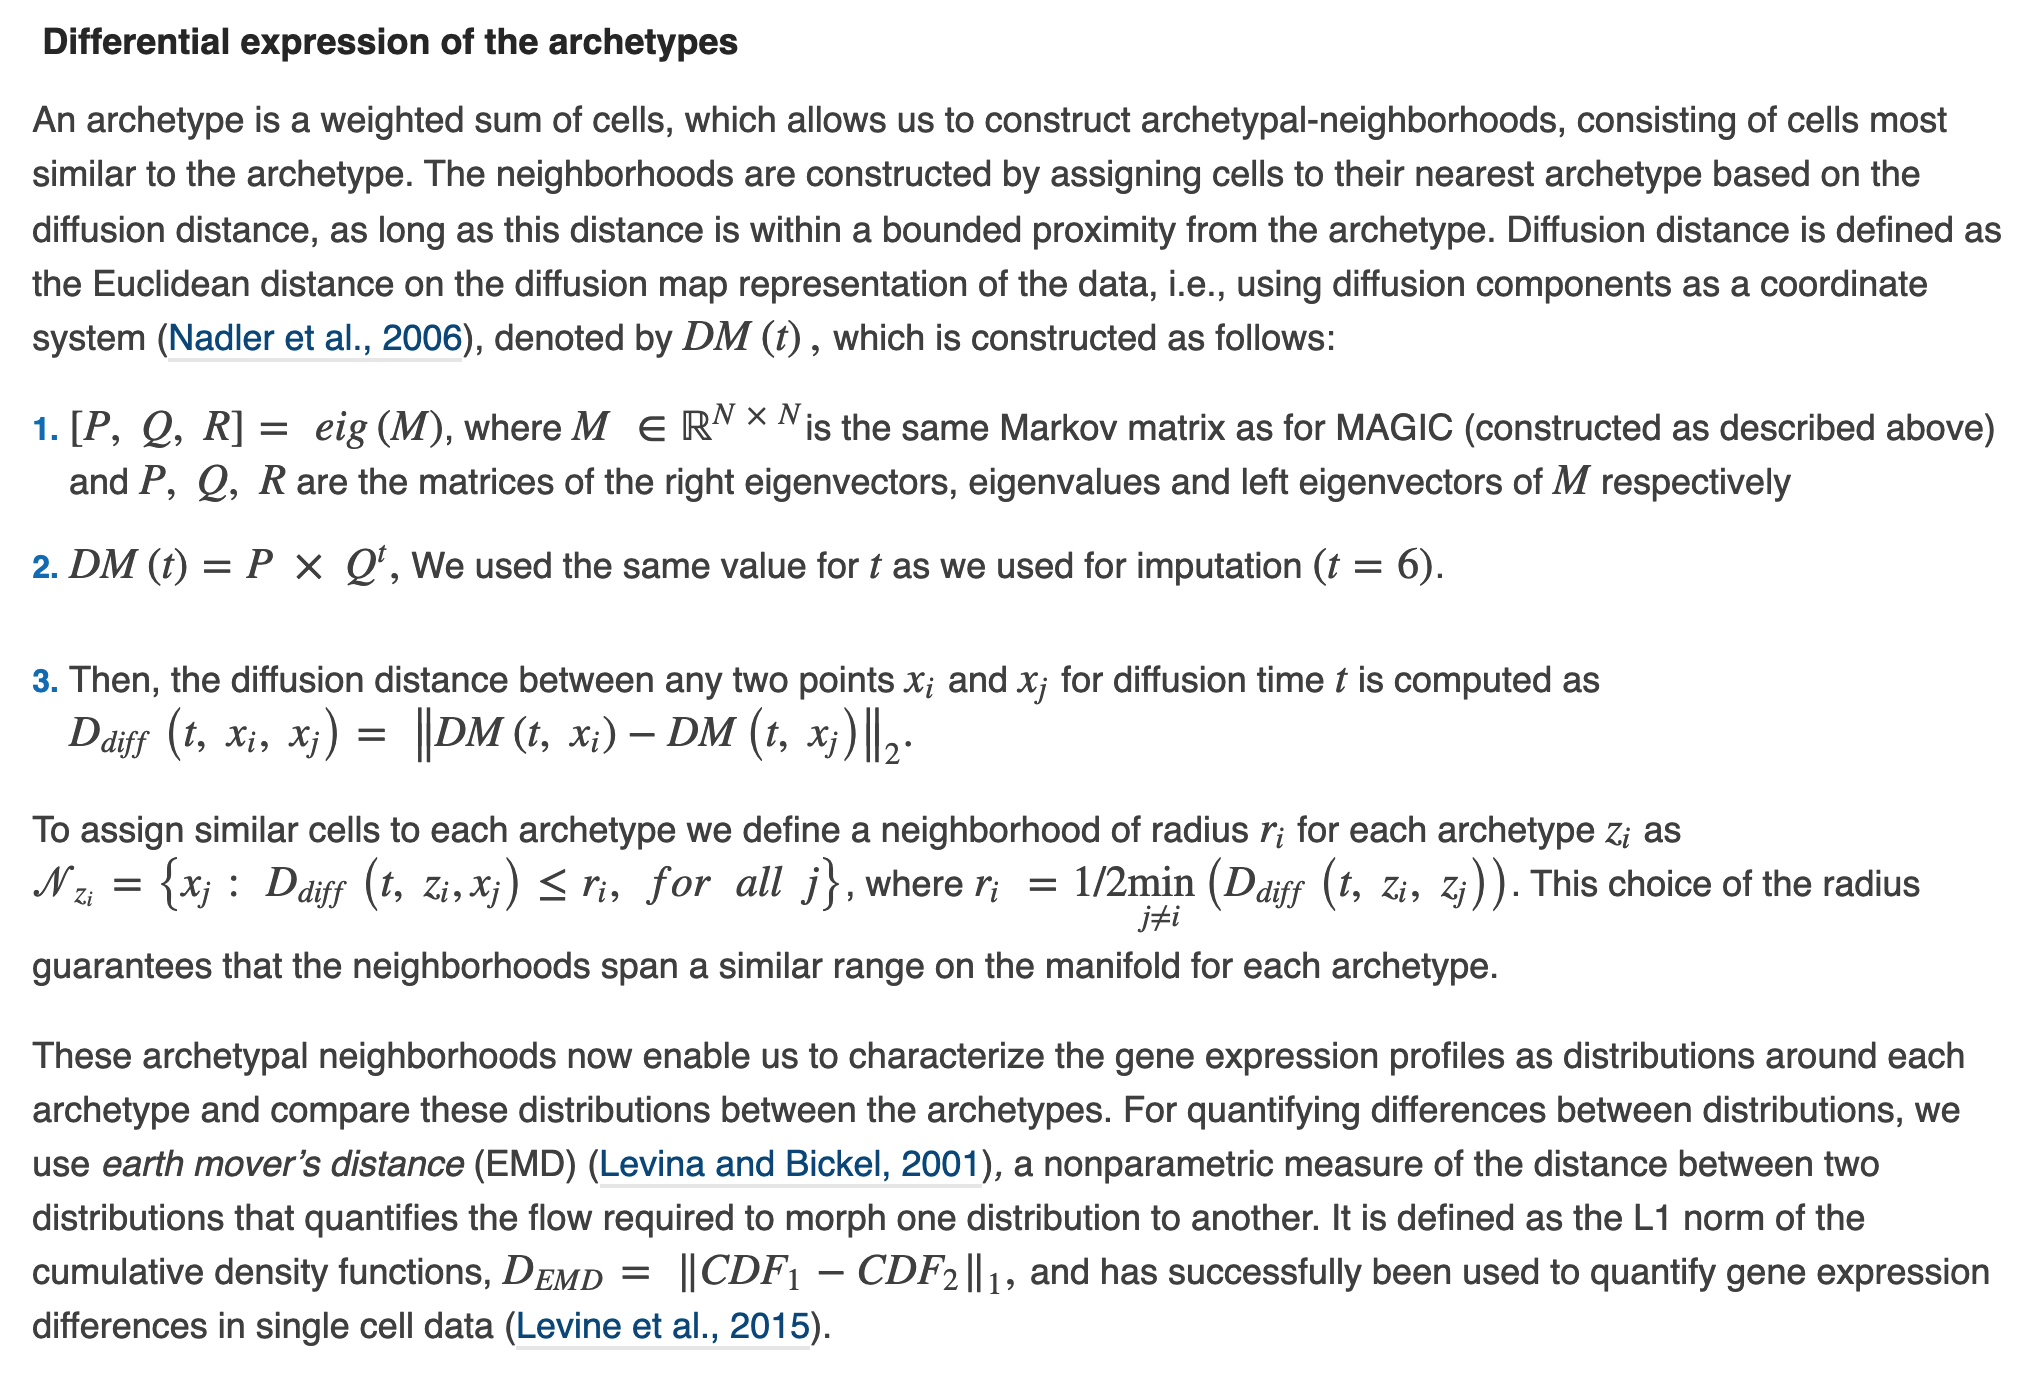

## Top 8 components of PCA
The top 8 components explain over 81% of the imputed data (and form the elbow of the EV vs PC curve), so we can double check that we get the same results when subsetting to these components. This shouldn't make much difference, but it will make a difference in the distances of cells to archetypes, since volume increases exponentially. The number of data points needed to robustly approximate the polytope also grows exponentially with the dimension.

Knee in EV vs k plot for different k_max:
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.09
k_max = 9
K* = 6 archetypes, distance between k* and line:  0.14
k_max = 10
K* = 6 archetypes, distance between k* and line:  0.17


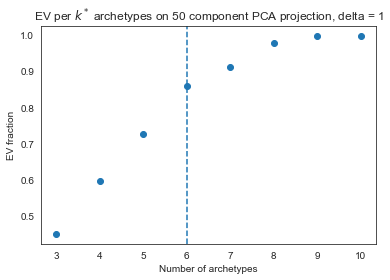

In [25]:
ev_per_arc = []
for i in range(3,11):
    XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'][:,0:8].T, noc=i, delta=0.1)
    ev_per_arc.append(varexpl)
    # print(varexpl)
plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)
plt.title(f"EV per $k^*$ archetypes on 50 component PCA projection, delta = {delta}")
plt.xlabel("Number of archetypes")
plt.ylabel("EV fraction")
print("Knee in EV vs k plot for different k_max:")
for kmax in range(8,11):
    print('k_max =', kmax)
    knee, farthestk = find_knee(ev_per_arc, kmax=kmax)
plt.axvline(x=knee, linestyle = "--")
plt.savefig(f'../../figures/EV_per_k_8comp_clines_delta_0.1.pdf')
plt.show()

**It looks like 6 archetypes still fit the data well.** We'll calculate the archetype locations in the top 8 dimensions, and then use the PC coefficient matrix to estimate the archetypes on the original phenotypic space.

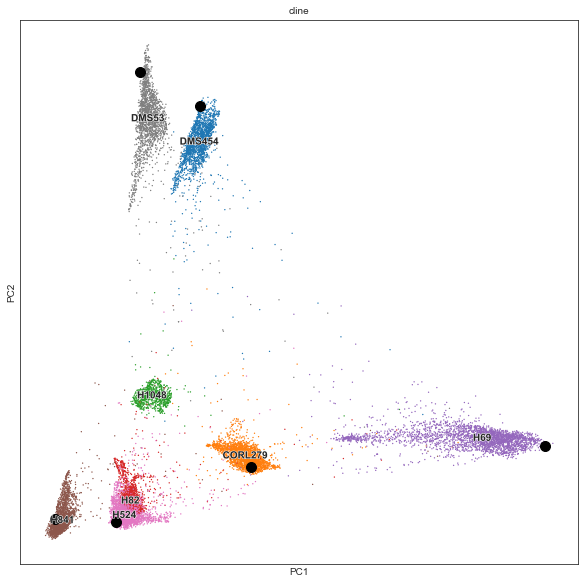

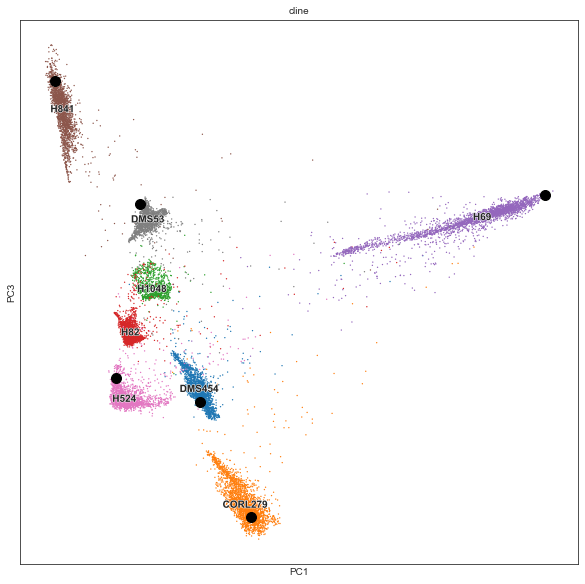

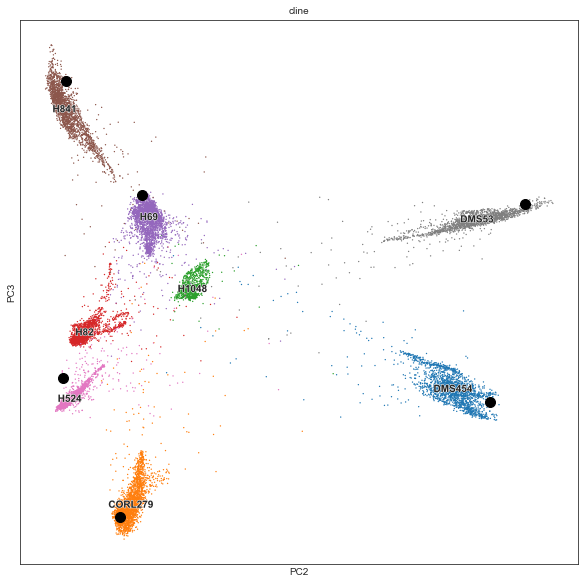

In [26]:
XC_6_8comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'][:,0:8].T, noc=6, delta=0.1)
XC_6_8comp = np.array(XC_6_8comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (10,10), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_6_8comp[int(comp[0])-1], XC_6_8comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

## Labeling cells based on diffusion distance to archetypes
From Van Dijk et al:
An archetype is a weighted sum of cells, which allows us to construct archetypal-neighborhoods, consisting of cells most similar to the archetype. The neighborhoods are constructed by assigning cells to their nearest archetype based on the diffusion distance, as long as this distance is within a bounded proximity from the archetype. Diffusion distance is defined as the Euclidean distance on the diffusion map representation of the data, i.e., using diffusion components as a coordinate system (Nadler et al., 2006), denoted by DM(t).

In [289]:
XC_df = pd.DataFrame(XC_5_50comp)
XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


In [290]:
X_magic_pca_df = pd.DataFrame(X_magic.obsm['X_pca'], index = X_magic.obs_names)
X_magic_full_df = X_magic_pca_df.append(XC_df.T)
X_magic_full_df.head()

0          1         2   \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454 -0.533001  15.783157 -4.999127   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454 -1.523991  13.803243 -5.344131   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454 -0.907271  16.635292 -5.618718   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454 -0.573030  15.642927 -5.679330   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454 -0.149213  14.805091 -4.791946   

                                                     3          4         5   \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454  4.431529  12.344715 -0.994273   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454  5.951599  12.662260  0.173870   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454  4.974217  13.788206 -1.106682   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454  5.476871  13.618507 -0.932564   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454  4.477124  12.224570 -0.283122   

                                                     6         7         8   \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454 -1.582305 -0.146019 -2.353136   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454  0.809394  4.074553  2.872071   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454 -1.578936  0.021298 -1.360840   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454 -1.982671 -2.147378  0.010732   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454 -0.215432 -1.115614  3.613449   

                                                     9   ...        40  \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454 -0.403415  ...  0.093539   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454 -2.464070  ... -0.042050   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454  0.362825  ...  0.040892   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454 -1.053164  ...  0.010547   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454  3.655601  ...  0.199946   

                                                     41        42        43  \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454 -0.044980 -0.184641  0.154725   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454 -0.104556 -0.057729 -0.049952   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454 -0.090968  0.053040  0.018579   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454 -0.176261 -0.163170  0.032600   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454 -0.246780 -0.148420 -0.108300   

                                                     44        45        46  \
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454  0.229788 -0.019431 -0.279231   
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454  0.222943 -0.012697 -0.111233   
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454  0.115013 -0.023503 -0.094937   
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454  0.065155 -0.001316 -0.088550   
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454 -0.307141  0.144003 -0.073842   

                                                     47        48        49  
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454 -0.593771 -0.075851 -0.083872  
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454 -0.060783  0.063759 -0.083973  
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454 -0.160806  0.062553 -0.120318  
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454 -0.098884  0.027512  0.091969  
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454  0.219010 -0.243986 -0.236940  

[5 rows x 50 columns]

In [318]:
pdx = squareform(pdist(X_magic_full_df, metric='euclidean')) # compute distances on pca
pdx_df = pd.DataFrame(pdx, index=X_magic_full_df.index, columns=X_magic_full_df.index)
pdx_df = pdx_df.loc[XC_df.columns].drop(XC_df.columns, axis = 1)
X_magic.obsm['arc_distance'] = pdx_df.T

Now that we have a euclidean distance to each archetype on the MAGIC imputed data, we can find a neighborhood with arbritrary radius to classify cells closest to each archetype as specialists. In Van Dijk et al., they choose a radius (distance on diffusion map) that is 1/2 the minimum of the distance between archetypes.

In [285]:
pdx_archetypes = squareform(pdist(XC_df.T, metric='euclidean')) # compute distances on pca

radius = .5*pdx_archetypes[pdx_archetypes > 0].min()

In [299]:
X_magic.obsm['arc_distance']['Arc_1']

2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454    35.336282
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454    34.107496
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454    36.472817
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454    35.840855
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454    34.946838
                                                   ...    
2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53      35.113936
2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53      35.382322
2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53      36.423780
2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53      33.513066
2639-SM-2-CTTGTA_S2:TTTGTGTCCAGTTTGCx-DMS53      37.469797
Name: Arc_1, Length: 16108, dtype: float64

In [322]:
tmp = X_magic.obsm['arc_distance'].copy()

In [328]:
# percent_radius = .1 # in percentage of datapoints; radius = .1 means 10% closest cells to each archetype

for arc in  X_magic.obsm['arc_distance'].columns:
    closest = X_magic.obsm['arc_distance'].loc[X_magic.obsm['arc_distance'][arc].sort_values() < radius]
    tmp.loc[closest.index,'specialist'] = arc


In [334]:
X_magic.obs['specialists_pca_diffdist'] = tmp.specialist

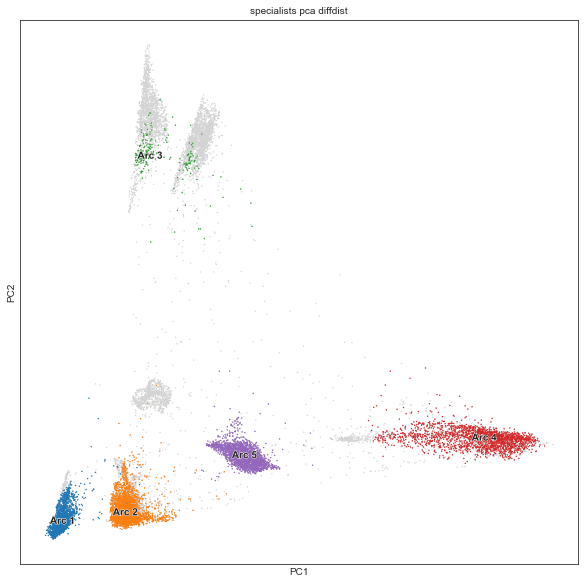

In [335]:
scv.pl.pca(X_magic, color = 'specialists_pca_diffdist', figsize= (10,10), frameon=True)


In [339]:
tmp.specialist = tmp.specialist.fillna('None')


In [341]:
pd.crosstab(tmp.specialist, X_magic.obs.cline)

cline       DMS454  CORL279  H1048   H82   H69  H841  H524  DMS53
specialist                                                       
Arc_1            0        0      0     0     0  1921     0      0
Arc_2            0        0      0   625     0     0  2257      0
Arc_3           63        0      0     0     0     0     0    158
Arc_4            0        0      0     0  2005     0     0      0
Arc_5            0     2336      0     0     0     0     0      0
None          1944       49    949  1086   794   142    88   1691

## !!! Labeling cells based on random walk to absorbing states
From Chan et al:
We solve this problem by using the probabilistic knn graph-based Phenograph classifier as implemented in the Phenograph package80 and has been shown to be highly successful in cases of mixed phenotypes which are frequently observed in cancer (Laughney et al., 2020). As input, we provide representative labeled cells for each known cell type. As output, each unlabeled cell is assigned a probability of belonging to each known cell type (termed Markov absorption probability). In cases where the probability for a given cell type is close to 1, we can annotate the cell with that cell type. In cases where the cell-type probability distribution is spread evenly across all cell types, we can consider these cells to represent a mixed phenotype. To implement this method, we first must have labeled training data available. To this end, we identify cells that can be confidently assigned to each subtype prior to calculating Markov absorption probabilities. Using reference RNA-sequencing of bulk tumors comparing SCLC subtypes (described in section ‘‘Differential expression in bulk reference datasets’’), we used the top 30 overexpressed DEGs per SCLC subtype and calculated the average Z-score over this gene set for each cell. The top 100 highest scoring cells were then used as training examples for each cell type. Next, we constructed a Markov graph from the dataset. We first constructed a diffusion map based on the first 56 PCs to obtain the first 15 diffusion components (DCs) retained by eigengap. Using the Phenograph package, we transformed this diffusion graph additionally into a Jaccard graph between k-neighborhoods, which has been shown to be more robust to noise. The resulting graph represents a Markov chain where we can therefore calculate the Markov absorption probabilities for each unlabeled cell to reach a labeled cell of a given subtype. Based on the resulting probabilities for each subtype, we can then perform a hard classification of SCLC subtype by maximum likelihood, or consider the per-cell probabilities of SCLC-A, SCLC-N, and SCLC-P to be a deconvolution of mixed phenotype that can be readily represented by a 3-coordinate ternary graph, as implemented in the ggtern package (Hamilton and Ferry, 2018)(Figure 1F). Of note, hard classification of SCLC subtypes on the UMAP shows that our feature selection facilitates a visualization that shows separation of cells based on canonical SCLC subtype while demonstrating inter-patient diversity (Figures 1A and 1G). This visualization stands in contrast to a previously published visualization of SCLC circulating tumor cell-derived xenograft cells where discrete clusters of cells represent different patients consistent with inter-patient diversity but without demonstrating clear relationship between patients (Stewart et al., 2020).

In [575]:
!pip install phenograph

     |████████████████████████████████| 159 kB 1.7 MB/s            
     |████████████████████████████████| 236 kB 3.0 MB/s            


In [622]:
import phenograph

# crazy reshaping necessary because phenograph classify requires a list of arrays, one array per subtype
c, P = phenograph.classify(train=[np.reshape(examples, (1, -1)) for examples in np.array(XC_df.T)], test = X_magic.obsm['X_pca'])

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

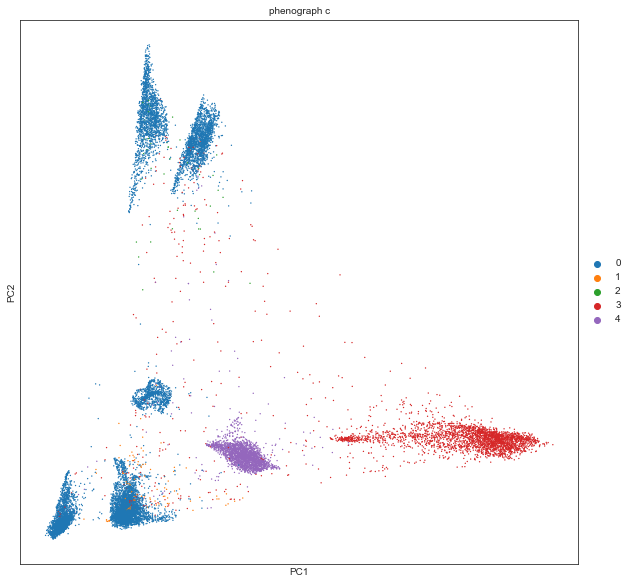

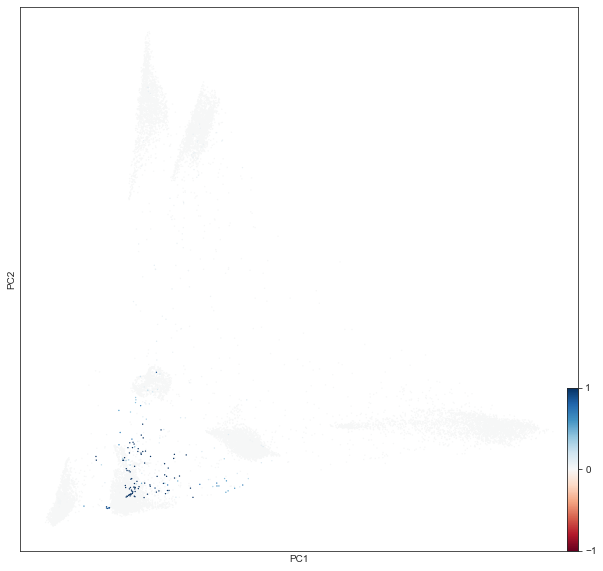

In [658]:
X_magic.obs['phenograph_c'] = c
X_magic.obsm['phenograph_P'] = P
scv.pl.pca(X_magic, c = 'phenograph_c', components='1,2', show=False, figsize= (10,10), frameon=True,  legend_loc = 'on right')

scv.pl.pca(X_magic, c = P[:,1], components='1,2', show=False, figsize= (10,10), frameon=True, cmap = 'RdBu', norm=CenteredNorm(0) )


Using just the archetypes to train on doesn't work too well. I'm going to try to use the 100 closest cells to each archetype instead.

# PCHA on MAGIC imputed data after scanorama

I also want to try applying MAGIC to the batch corrected data to see if it gives us a different result. If not, we will probably stick with the un-batch-corrected data to change the data as little as possible.

In [265]:
adata_SC = sc.read_h5ad("../../out/cell-lines/adata_SC_01.h5ad")
sc.pp.filter_genes(adata_SC, min_cells=3)
magic_operator_scan = magic.MAGIC(solver='approximate')
X_magic_scanorama = magic_operator_scan.fit_transform(adata_SC)

Calculating MAGIC...
  Running MAGIC on 16108 cells and 20596 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 112.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 31.96 seconds.
    Calculating affinities...
    Calculated affinities in 34.05 seconds.
  Calculated graph and diffusion operator in 178.64 seconds.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 181.55 seconds.


In [267]:
sc.pp.pca(X_magic_scanorama)

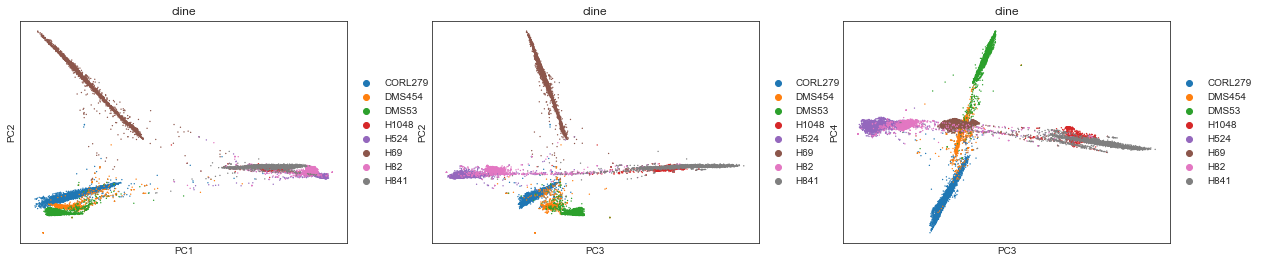

In [268]:
sc.pl.pca(X_magic_scanorama, color='cline', components=['1,2', '3,2', '3,4'])

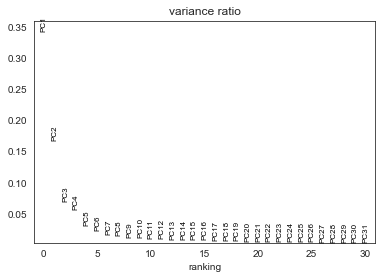

In [269]:
sc.pl.pca_variance_ratio(X_magic_scanorama)

In [270]:
X_magic_scanorama.write_h5ad('../../out/cell-lines/X_magic_scanorama_02.h5ad')

In [273]:
pca_var = X_magic_scanorama.uns['pca']['variance_ratio']

tot_exp_var = 0
n = 0
for i in pca_var:
    n +=1
    tot_exp_var += i
    if tot_exp_var > .8: 
        print(n)
        break

17


In this dataset, we need slightly more PCs to reach the same level of explained variance.

Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.05
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.06
k_max = 10
K* = 5 archetypes, distance between k* and line:  0.07


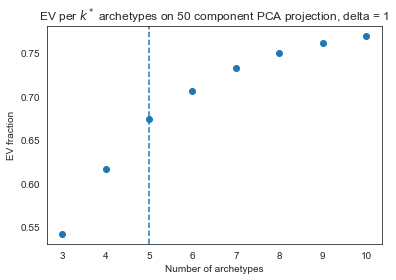

In [274]:
ev_per_arc = []
for i in range(3,11):
    XC, S, C, SSE, varexpl = PCHA(X_magic_scanorama.obsm['X_pca'].T, noc=i, delta=0.1)
    ev_per_arc.append(varexpl)
    # print(varexpl)
plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)
plt.title(f"EV per $k^*$ archetypes on 50 component PCA projection, delta = {delta}")
plt.xlabel("Number of archetypes")
plt.ylabel("EV fraction")
print("Knee in EV vs k plot for different k_max:")
for kmax in range(8,11):
    print('k_max =', kmax)
    knee, farthestk = find_knee(ev_per_arc, kmax=kmax)
plt.axvline(x=knee, linestyle = "--")
plt.savefig(f'../../figures/EV_per_k_scanorama_clines_delta_0.1.pdf')
plt.show()

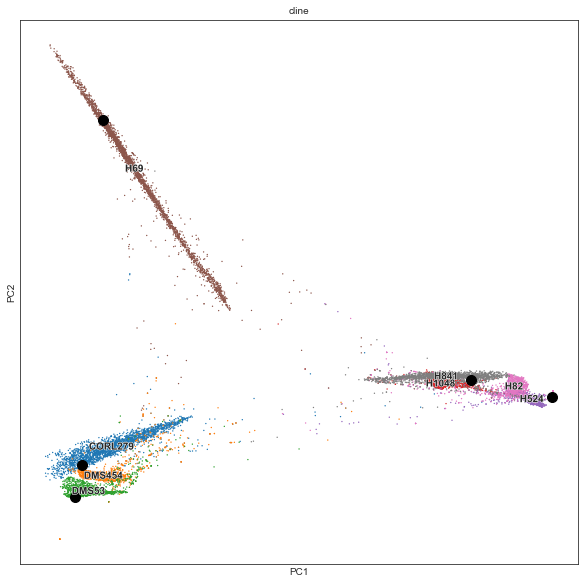

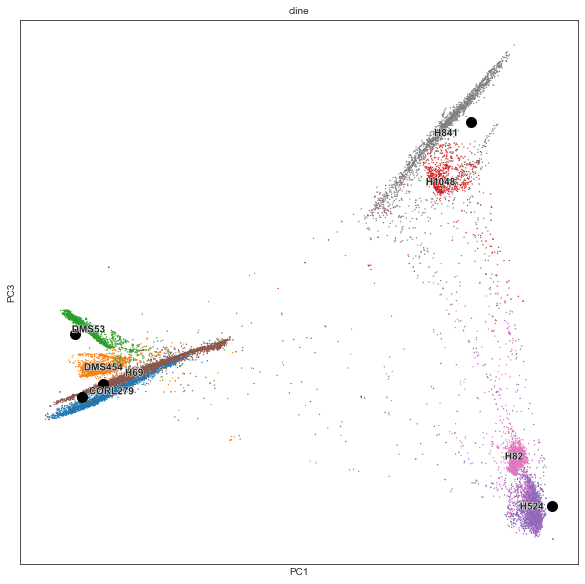

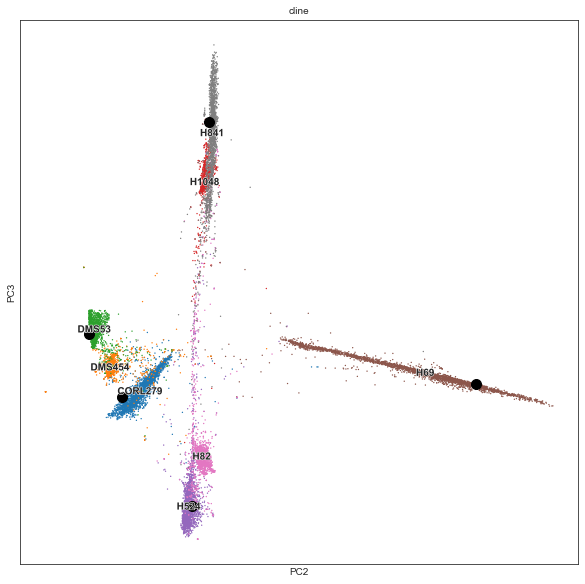

In [275]:
XC_scanorama, S, C, SSE, varexpl = PCHA(X_magic_scanorama.obsm['X_pca'].T, noc=5, delta=0.1)
XC_scanorama = np.array(XC_scanorama)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic_scanorama, color = 'cline', components=components, show=False, figsize= (10,10), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_scanorama[int(comp[0])-1], XC_scanorama[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()


## Labeling cells based on diffusion distance to archetypes
From Van Dijk et al:
An archetype is a weighted sum of cells, which allows us to construct archetypal-neighborhoods, consisting of cells most similar to the archetype. The neighborhoods are constructed by assigning cells to their nearest archetype based on the diffusion distance, as long as this distance is within a bounded proximity from the archetype. Diffusion distance is defined as the Euclidean distance on the diffusion map representation of the data, i.e., using diffusion components as a coordinate system (Nadler et al., 2006), denoted by DM(t).

In [342]:
XC_df = pd.DataFrame(XC_scanorama)
XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


In [348]:
X_magic_pca_df = pd.DataFrame(X_magic_scanorama.obsm['X_pca'], index = X_magic_scanorama.obs_names)
X_magic_full_scanorama_df = X_magic_pca_df.append(XC_df.T)
X_magic_full_scanorama_df.head()

0         1         2   \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279 -0.141413 -0.075434 -0.028579   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279 -0.168227 -0.078775 -0.032382   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279 -0.135984 -0.074327 -0.024976   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279 -0.102356 -0.047927 -0.014604   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279 -0.097692 -0.047519 -0.012685   

                                                      3         4         5   \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279 -0.114057 -0.026928 -0.030045   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279 -0.130697 -0.027156 -0.044438   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279 -0.104301 -0.018707 -0.022140   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279 -0.088808  0.010362 -0.036843   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279 -0.072455  0.010024 -0.022526   

                                                      6         7         8   \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279 -0.002582 -0.032526 -0.002553   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279  0.008475 -0.036431  0.006627   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279 -0.002197 -0.026818 -0.000073   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279 -0.003906  0.015714 -0.004023   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279 -0.006210  0.010713 -0.006576   

                                                      9   ...        40  \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279  0.003266  ... -0.000019   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279 -0.001146  ...  0.002955   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279  0.005226  ... -0.000266   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279  0.009625  ...  0.000392   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279  0.010895  ...  0.001160   

                                                      41        42        43  \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279  0.010906 -0.001163 -0.011019   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279  0.011798  0.000620 -0.005120   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279  0.015131 -0.002257 -0.006576   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279 -0.005682 -0.000851  0.003921   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279  0.004129 -0.002063  0.003405   

                                                      44            45  \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279 -0.008998  8.567768e-07   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279 -0.004109 -8.127596e-04   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279 -0.002217  1.745969e-03   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279  0.004763  2.206145e-03   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279  0.002656  5.314335e-03   

                                                      46        47        48  \
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279 -0.005937 -0.003005  0.007886   
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279 -0.018996 -0.000961  0.005713   
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279 -0.011571 -0.002916  0.007473   
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279  0.006274  0.001738 -0.003812   
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279 -0.007697 -0.002936  0.001121   

                                                      49  
2637-SM-2-CTTGTA_S2:AAAACGCCTGATTAGACx-CORL279  0.012039  
2637-SM-2-CTTGTA_S2:AAAACTCGAAGAAGTTAx-CORL279  0.006473  
2637-SM-2-CTTGTA_S2:AAAACCTCCCTACCGTTx-CORL279  0.001964  
2637-SM-2-CTTGTA_S2:AAAACGCCTGCCAAGATx-CORL279 -0.004381  
2637-SM-2-CTTGTA_S2:AAAACCTCCACGCAGAGx-CORL279 -0.002824  

[5 rows x 50 columns]

In [349]:
pdx = squareform(pdist(X_magic_full_scanorama_df, metric='euclidean')) # compute distances on pca
pdx_df = pd.DataFrame(pdx, index=X_magic_full_scanorama_df.index, columns=X_magic_full_scanorama_df.index)
pdx_df = pdx_df.loc[XC_df.columns].drop(XC_df.columns, axis = 1)
X_magic_scanorama.obsm['arc_distance'] = pdx_df.T

Now that we have a euclidean distance to each archetype on the MAGIC imputed data, we can find a neighborhood with arbritrary radius to classify cells closest to each archetype as specialists. In Van Dijk et al., they choose a radius (distance on diffusion map) that is 1/2 the minimum of the distance between archetypes.

In [350]:
pdx_archetypes = squareform(pdist(XC_df.T, metric='euclidean')) # compute distances on pca

radius = .5*pdx_archetypes[pdx_archetypes > 0].min()

In [351]:
# percent_radius = .1 # in percentage of datapoints; radius = .1 means 10% closest cells to each archetype
tmp = X_magic_scanorama.obsm['arc_distance'].copy()
for arc in  X_magic_scanorama.obsm['arc_distance'].columns:
    closest = X_magic_scanorama.obsm['arc_distance'].loc[X_magic_scanorama.obsm['arc_distance'][arc].sort_values() < radius]
    tmp.loc[closest.index,'specialist'] = arc


In [352]:
X_magic_scanorama.obs['specialists_pca_diffdist'] = tmp.specialist

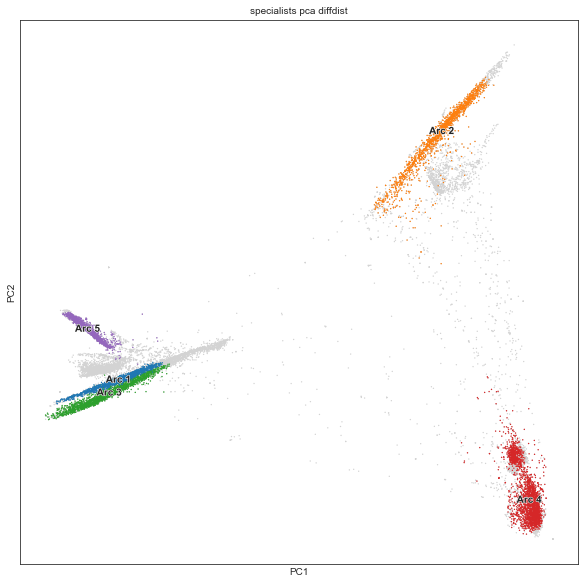

In [357]:
scv.pl.pca(X_magic_scanorama, color = 'specialists_pca_diffdist', components="1,3",figsize= (10,10), frameon=True)


In [354]:
tmp.specialist = tmp.specialist.fillna('None')


In [356]:
pd.crosstab(tmp.specialist, X_magic.obs.cline).style.background_gradient("viridis")

## Cell cycle regression followed by MAGIC-- alternative to above code block

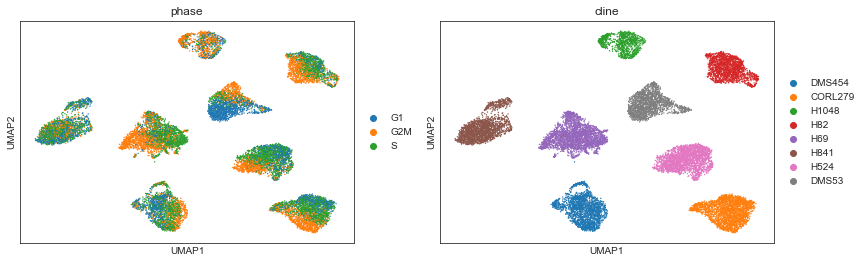

In [359]:
# dropkick recipe already scores cell cycle genes
sc.pl.umap(adata, color=['phase','cline'])

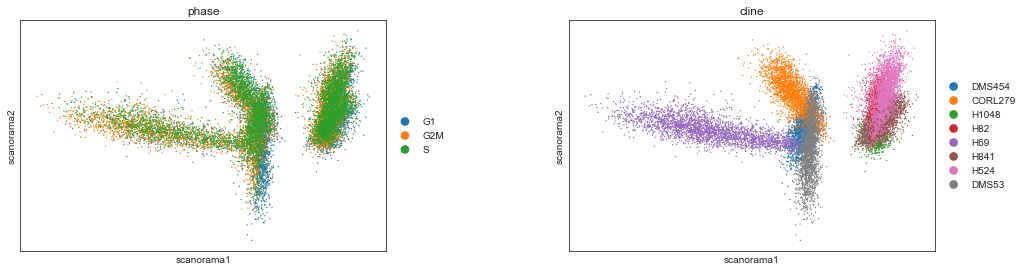

In [360]:
sc.pl.scatter(adata, color=['phase','cline'], basis = 'scanorama')

In [361]:
adata.obs["cell_cycle_diff"] = adata.obs["S_score"] - adata.obs["G2M_score"]


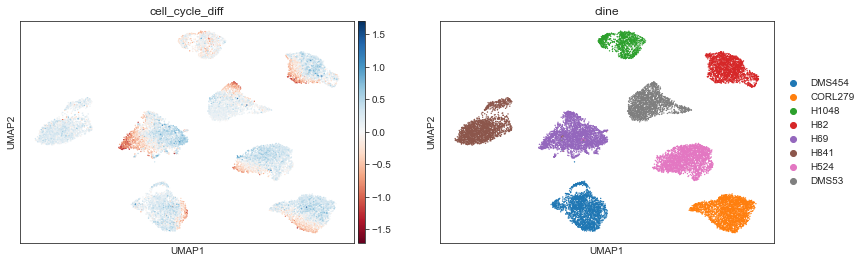

In [370]:
from matplotlib.colors import CenteredNorm 
sc.pl.umap(adata, color=['cell_cycle_diff', 'cline'], cmap = 'RdBu', norm=CenteredNorm(0))

In [21]:
# sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
# sc.pp.scale(adata)

In [24]:
# sc.pp.neighbors(adata, random_state=0)
# sc.tl.leiden(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


# Projection of Single Cell Data into Bulk PCA

We read in the cell lines, rescale, and run a PCA (which mean-center the data). N.B. the archetype location gene lists got messed up from Excel dates, so we remove the genes that no longer match.

In [235]:
bulk = pd.read_csv('../../../data/bulk-rna-seq/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv', header = 0, index_col = 0)
bulk.head()

m.DMS153  m.NCIH60  m.NCIH69  m.NCIH82  m.NCIH128  m.NCIH146  \
A1BG    2.955199  3.239727  3.599770  3.055231   4.579507   4.685081   
A1CF    0.077212  0.167166  0.117398  0.536179   0.088160   0.074992   
A2M     2.267502  0.122302  0.085891  1.586479   0.064500   0.231189   
A2ML1   0.011011 -0.007241 -0.005086 -0.004471  -0.003819   0.011107   
A4GALT  2.453512  1.528297  1.428711  0.359365   0.865621   0.867495   

        m.NCIH187  m.NCIH209  m.NCIH211  m.NCIH250  ...  c.NCIH524  c.NCIH526  \
A1BG     3.215947   4.181752   1.288835   4.804468  ...   4.183146   3.405942   
A1CF     0.080727   0.079204   0.107217   0.090348  ...  -0.057567   0.623162   
A2M      0.059062   0.072303   0.189474   0.066101  ...  -0.038265  -0.006552   
A2ML1   -0.003497  -0.003431  -0.004644  -0.003914  ...   0.003116   0.006167   
A4GALT   2.455182   1.037618   0.265048   3.132071  ...   0.569911   1.458448   

        c.NCIH69  c.NCIH82  c.NCIH841  c.NCIH889    c.SBC5  c.SCLC21H  \
A1BG    4.256034  3.905371   4.436237   5.073359  4.423783   3.713345   
A1CF   -0.107734 -0.016782   0.183740   0.242981  0.008349   0.003494   
A2M     0.040540  0.221331   1.276428   0.039852  0.681201   0.032354   
A2ML1   0.006514  0.017533   0.015672   0.114451  0.043520   0.004658   
A4GALT  0.513539  0.191663   3.127982   0.086832  2.641161   0.764500   

         c.SHP77  c.SW1271  
A1BG    3.438644  4.209637  
A1CF   -0.073834 -0.001700  
A2M     1.635919  0.303402  
A2ML1   0.003820  0.031692  
A4GALT  0.861152  1.868799  

[5 rows x 120 columns]

In [236]:
bulk = bulk.loc[[i not in ['MARC1', 'MARC2', 'MARCH1', 'MARCH11', 'MARCH2', 'MARCH3', 'MARCH4', 'MARCH5', 'MARCH6', 'MARCH7', 'MARCH8', 'MARCH9', 'SEPT10', 'SEPT11', 'SEPT12', 'SEPT14', 'SEPT2', 'SEPT3', 'SEPT4', 'SEPT5', 'SEPT6', 'SEPT7', 'SEPT8', 'SEPT9'] for i in bulk.index]]

In [237]:
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA

shared_genes = sorted(list(set(adata.var_names).intersection(bulk.index)))
bulk = bulk.loc[shared_genes]
bulk = pd.DataFrame(pp.scale(bulk), columns = bulk.columns, index = bulk.index)
# bulk = bulk / np.linalg.norm(bulk, axis=0)

pca = PCA(n_components=20)
data_pca = pca.fit_transform(bulk.T)
pca_df = pd.DataFrame(data_pca)



We also read in the archetype locations and transform with the same PCA.

In [433]:
arc = pd.read_csv('../../../data/bulk-rna-seq/arc_gene_space_no_lowgenes-10-21-20.csv', header = None, index_col = None)
arc_genes = pd.read_csv('../../../data/bulk-rna-seq/geneNames_wo_lowgenes.csv', header = None, index_col = None)
arc.columns = arc_genes[0]
arc = arc.T
arc.columns = ['SCLC-Y','SCLC-P','SCLC-N', 'SCLC-A2', 'SCLC-A']
arc.head()

SCLC-Y    SCLC-P    SCLC-N   SCLC-A2    SCLC-A
0                                                       
A1BG    3.639489  1.927857  4.448826  3.321331  4.151298
A1CF    0.218535  0.690655  0.011054  0.600117 -0.178952
A2M     0.915044  0.403488  0.262599  0.418040  0.058488
A2ML1   0.145542  0.073408  0.025584  0.033519  0.096227
A4GALT  3.311321  0.334271  1.159494  1.775815  0.996153

In [434]:
arc = arc.loc[shared_genes]
arc = pd.DataFrame(pp.scale(arc), columns = arc.columns, index = arc.index)

# arc = arc / np.linalg.norm(arc, axis=0)

arc_pca = pca.transform(arc.T)
arc_pca_df = pd.DataFrame(arc_pca, index=arc.columns)
arc_pca_df['color'] = arc.columns



## Projection of Original Single Cell Data
We compare the original (filtered, normalized, log-transformed) single cell data directly to the bulk archetypes by transforming with the same PCA.

In [240]:
tmp = adata[:,shared_genes]
adata_df = pd.DataFrame(tmp.X, index=tmp.obs_names, columns=tmp.var_names)
adata_df = adata_df.T
adata_df = pd.DataFrame(pp.scale(adata_df), columns = adata_df.columns, index = adata_df.index)

# adata_df = adata_df / np.linalg.norm(adata_df, axis=0)

adata_pca = pca.transform(adata_df.T)



/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


In [241]:
adata_pca_df = pd.DataFrame(adata_pca, index=adata_df.columns)


<AxesSubplot:xlabel='0', ylabel='1'>

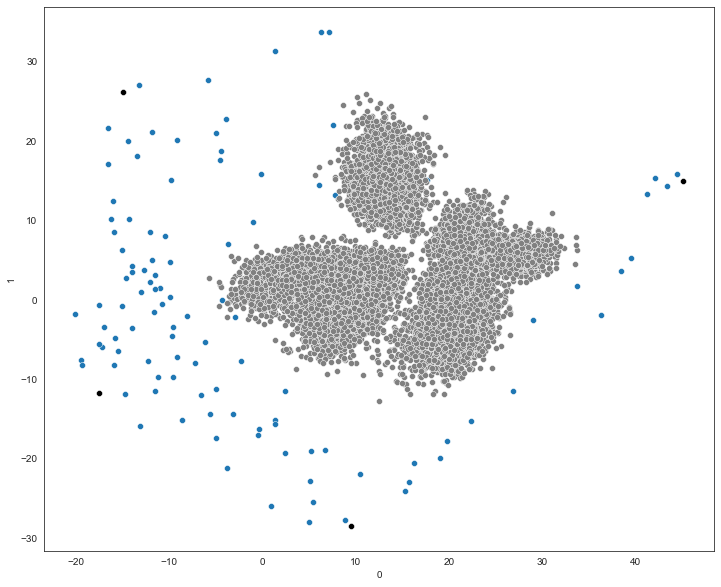

In [242]:
plt.figure(figsize = (12,10))
sns.scatterplot(pca_df[0], pca_df[1])
sns.scatterplot(arc_pca_df[0], arc_pca_df[1], color = 'k')
sns.scatterplot(adata_pca_df[0], adata_pca_df[1], color = 'grey')

# sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  adata.obs['cline'])#adata.obs['cline'].values)
# sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')

# plt.figure(figsize = (12,10))
# sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  all_df['cluster'], 
#                 palette = [cp[0],cp[1],cp[2],cp[3],'grey',cp[4]])#adata.obs['cline'].values)
# sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


# plt.show()
# plt.figure(figsize = (12,10))
# sns.scatterplot(-adata_arc.loc[pcs_to_plot[0]],-adata_arc.loc[pcs_to_plot[1]], hue =  adata.obs['Phenotype'].values,
#                palette = ['grey','lightgrey','red','orange','green','blue','purple'])#
# sns.scatterplot(-sc_arc_genes_pc.loc[pcs_to_plot[0]],-sc_arc_genes_pc.loc[pcs_to_plot[1]], color = 'black')


## Projection of MAGIC imputed data

In [243]:
tmp = X_magic[:,shared_genes]
magic_df = pd.DataFrame(tmp.X, index=tmp.obs_names, columns=tmp.var_names)
magic_df = magic_df.T
# magic_df = magic_df / np.linalg.norm(magic_df, axis=0)
magic_df = pd.DataFrame(pp.scale(magic_df), columns = magic_df.columns, index = magic_df.index)


magic_pca = pca.transform(magic_df.T)

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


In [244]:
magic_pca_df = pd.DataFrame(magic_pca, index=magic_df.columns)


In [245]:
cline_dict = {sorted(X_magic.obs.cline.unique())[i]:X_magic.uns['cline_colors'][i] for i in range(0,8)}

<AxesSubplot:xlabel='0', ylabel='1'>

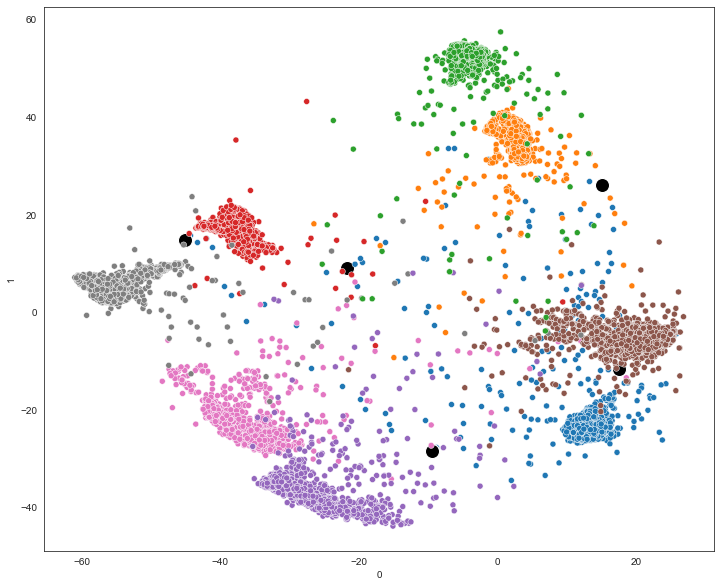

In [536]:

plt.figure(figsize = (12,10))
sns.scatterplot(-pca_df[0], pca_df[1])
sns.scatterplot(-arc_pca_df[0], arc_pca_df[1], color = 'k', s = 200)
sns.scatterplot(-magic_pca_df[0], magic_pca_df[1], c = [cline_dict[i] for i in X_magic.obs['cline']])


### Compare the variance explained to the variance explained by shuffled PCs.

In [214]:
from sklearn.utils import shuffle

Total variance in imputed and scaled single cell dataset:

In [371]:
tot_var = magic_df.T.var().sum()
tot_var

12187.799

In [ ]:
ev = []
for i in range(10):
    ran = shuffle(bulk)
    ran.index = bulk.index
    ran_pca = PCA(n_components=50)
    ran_data_pca = ran_pca.fit_transform(ran.T)
    ran_pca_df = pd.DataFrame(ran_data_pca)
    magic_pca_rand = ran_pca.transform(magic_df.T)
    magic_pca_df_rand = pd.DataFrame(magic_pca_rand, index=magic_df.columns)
    ev.append(list(magic_pca_df_rand.var()/tot_var))


Text(0.5, 1.0, 'Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')

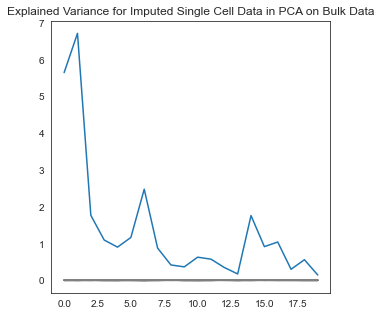

In [258]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df.var()/tot_var)
for i in range(10):
    plt.plot([100*x for x in ev[i]], c = 'grey')
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')

### Compare the variance explained to the variance explained in shuffled data.

In [402]:
# Shuffling preserves total variance in data
shuffle(magic_df).T.var().sum()

12187.799

In [379]:
ev = []
for i in range(10):
    pca = PCA(n_components=50)
    data_pca = pca.fit_transform(bulk.T)
    pca_df = pd.DataFrame(data_pca)
    magic_pca_50 = pca.transform(magic_df.T)
    magic_pca_df_50 = pd.DataFrame(magic_pca_50, index=magic_df.columns)

    # fit shuffled data
    magic_pca_rand = pca.transform(shuffle(magic_df).T)
    magic_pca_df_rand = pd.DataFrame(magic_pca_rand, index=magic_df.columns)
    ev.append(list(magic_pca_df_rand.var()/tot_var))


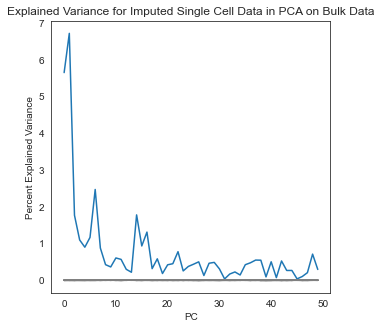

In [399]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df_50.var()/tot_var)
for i in range(10):
    plt.plot([100*x for x in ev[i]], c = 'grey')
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')
plt.ylabel("Percent Explained Variance")
plt.xlabel("PC")
plt.show()

In [430]:
#ev_df for seaborn 
flat_list = [item for sublist in ev for item in sublist]
ev_df = pd.DataFrame(10*list(range(50)), columns=['PC'])
ev_df['ev'] = [100*i for i in flat_list]

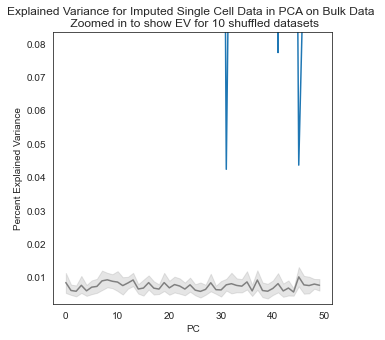

In [541]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df_50.var()/tot_var)
# for i in range(10):
#     plt.plot([100*x for x in ev[i]], c = 'grey')
sns.lineplot(data = ev_df, x = 'PC', y = 'ev', color = 'grey')
plt.ylim(100*min(min(ev)),500*max(max(ev)))
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data \n Zoomed in to show EV for 10 shuffled datasets')
plt.ylabel("Percent Explained Variance")
plt.xlabel("PC")
plt.show()

In [449]:
# XC_df_loadings = pd.DataFrame(X_magic.varm['PCs'], index = X_magic.var_names)

# XC_df = pd.DataFrame(XC_5_50comp)
# XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


# X_Magic_arc_genespace = XC_df_loadings.dot(XC_df)


# arc.join(X_Magic_arc_genespace)

In [480]:
adata.write_h5ad('../../out/cell-lines/adata_02.h5ad')

In [484]:
X_magic.write_h5ad("../../out/cell-lines/X_magic_02.h5ad")

In [485]:
X_magic_scanorama.write_h5ad("../../out/cell-lines/X_magic_scanorama_02.h5ad")

# Comparison of single cell archetypes to bulk archetypes using Hausser et al. code

To do this, we will downscale the data using geosketch. This should keep an accurate representation of the shape of the data, but will make the ParTI matlab code more efficient. We will think run archetype analysis using ParTI, and compare the single cell and bulk archetypes using the Hausser code (hypergeometric tests on enrichments). 

We will use the PCA of the MAGIC imputed data.

In [546]:
gs_pca = X_magic.obsm['X_pca']

In [550]:
from geosketch import gs
N = 3000 # Number of samples to obtain from the data set.
sketch_index = gs(gs_pca, N, replace=False)



In [551]:
X_sketch = gs_pca[sketch_index]

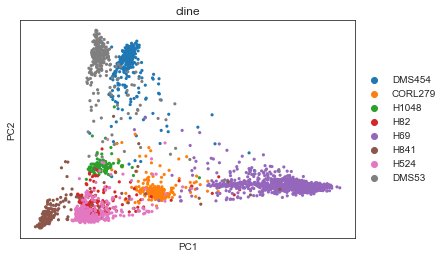

In [559]:
sc.pl.pca(X_magic[sketch_index,:], color = 'cline')

In [564]:
np.savetxt("../../out/cell-lines/downsampled_X_magic_for_ParTI.csv", X_magic[sketch_index,:].X, delimiter=",")


In [574]:
np.savetxt("../../out/cell-lines/X_magic_for_ParTI_GeneNames.csv", X_magic.var_names, fmt='%s')
